In [1]:
from projects.NeuralForceField.train import *
from projects.NeuralForceField.graphs import * 
import numpy as np

In [2]:
# ethanol data 
train = np.load('/home/wwj/data/ethanol_ccsd_t-train.npz')
xyz_data = np.dstack((np.array([train.f.z]*1000).reshape(1000, -1, 1), np.array(train.f.R)))
force_data = train.f.F
energy_data = train.f.E.squeeze()

In [3]:
graph_data = load_graph_data(xyz_data=xyz_data, energy_data=energy_data, batch_size=100, cutoff=5.0,
                             force_data=force_data, au_flag=False, subtract_mean_flag = True)

In [4]:
# initialize parameters
par = dict()

par["n_filters"] = 256
par["n_gaussians"] = 32
par["n_atom_basis"] = 256
par["optim"] = 1e-4
par["scheduler"] = True
par["train_percentage"] = 0.8
par["T"] = 10
par["batch_size"] = 100
par["cutoff"] = 5.0 
par["max_epoch"] = 1000
par["trainable_gauss"] = True
par["rho"] = 0.1
par["eps"] = 1e-5

In [5]:
model = Model(par=par, graph_data=graph_data, device=3, job_name="test", graph_batching=False, root='./log/')

In [6]:
model.train(1)

/home/wwj/Repo/projects/NeuralForceField/train.py:198: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  train_u = train_u_mae.data[0]/self.N_train
/home/wwj/Repo/projects/NeuralForceField/train.py:199: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  train_force = train_force_mae.data[0]/self.N_train


epoch 0  U train: 4.441  force train 18.145


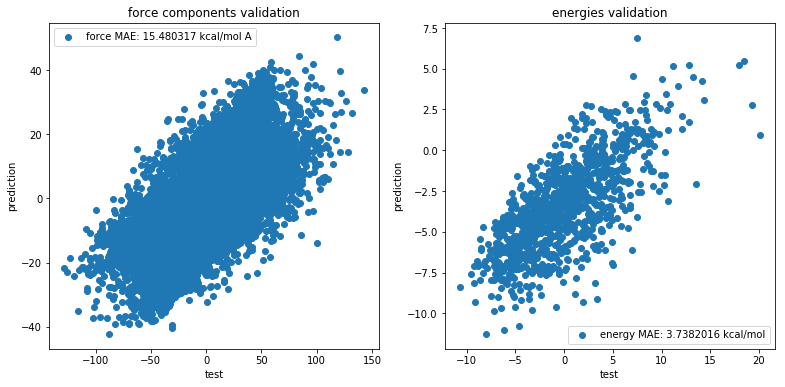

In [7]:
model.validate(data=model.data)

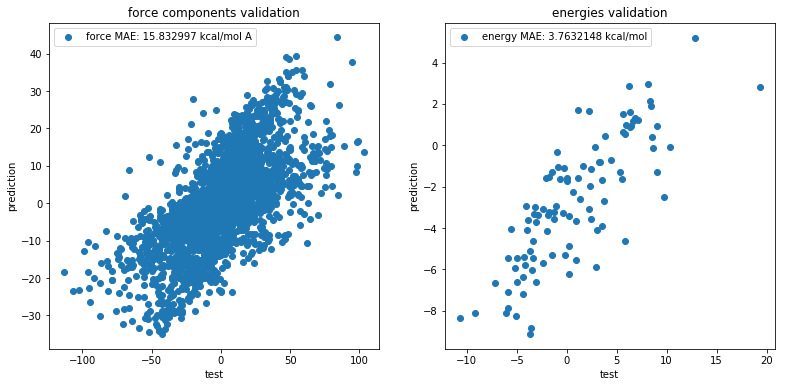

In [8]:
model.save_summary()

In [11]:
model.NVE(steps=100, dt=0.1)

Energy per atom: Epot = -0.032eV  Ekin = 0.019eV (T=150K)  Etot = -0.013eV
Energy per atom: Epot = -0.027eV  Ekin = 0.010eV (T= 75K)  Etot = -0.017eV
Energy per atom: Epot = -0.035eV  Ekin = 0.026eV (T=199K)  Etot = -0.009eV
Energy per atom: Epot = -0.032eV  Ekin = 0.021eV (T=159K)  Etot = -0.012eV
Energy per atom: Epot = -0.036eV  Ekin = 0.028eV (T=218K)  Etot = -0.008eV


In [16]:
type("sdf") == str

True

In [10]:
len('dsf')

3